In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


In [3]:
# read in etopo5 topography/bathymetry.
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo2.nc'
etopodata = Dataset(url)
lons = etopodata.variables['etopo2_x'][:]
lats = etopodata.variables['etopo2_y'][:]
topoin = etopodata.variables['rose'][:]

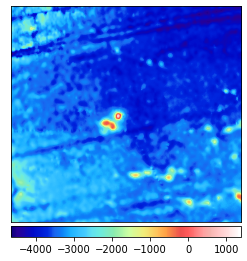

In [6]:
# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=-16,llcrnrlat=-40.,urcrnrlon=-8,urcrnrlat=-34,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='h',area_thresh=1000.,projection='merc',\
            ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
nx=int((16-8)/0.01+1)
ny=int((40-34)/0.01+1)
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
# draw coastlines and political boundaries.
m.drawcoastlines()
mx=np.arange(-40,-34+0.001,0.01)
my=np.arange(-16,-8+0.001,0.01)
# draw parallels and meridians.
# label on left and bottom of map.

# add colorbar
cb = m.colorbar(im,"bottom", size="5%", pad='2%')

plt.show()

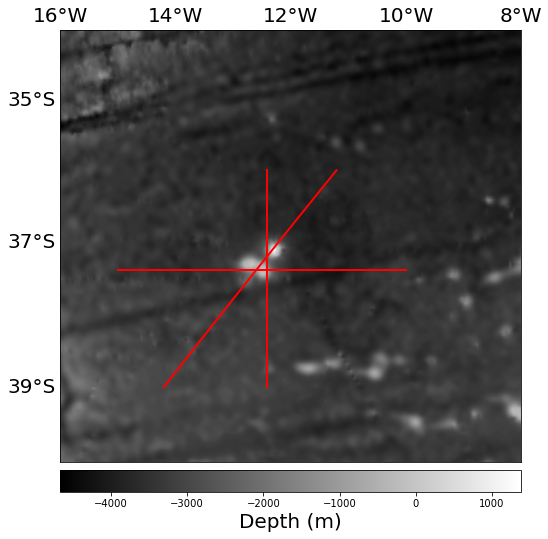

In [498]:
# create the figure and axes instances.
fig = plt.figure(figsize=(8,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=-16,llcrnrlat=-40.,urcrnrlon=-8,urcrnrlat=-34,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='h',area_thresh=1000.,projection='merc',\
            ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
nx=int((16-8)/0.01+1)
ny=int((40-34)/0.01+1)
#topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
#im = m.imshow(topodat,cm.GMT_hawaii)
im = m.imshow(topodat,cmap = plt.get_cmap('gray'))

# draw coastlines and political boundaries.
m.drawcoastlines()
mx=np.arange(-40,-34+0.001,0.01)
my=np.arange(-16,-8+0.001,0.01)
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(-39,-34+0.001,2)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,linewidth=0.0,labels=[1,0,0,0],size=20)
parallels = np.arange(-16,-8+0.001,2)
# labels = [left,right,top,bottom]
m.drawmeridians(parallels,linewidth=0.0,labels=[0,0,1,0],size=20)
# add colorbar
cb = m.colorbar(im,"bottom", size="5%", pad='2%')
cb.set_label('Depth (m)',size=20)
#ax.set_title('ETOPO5 Topography')
'''
m.plot(-12.4, -37.4,'or',markersize=50,linewidth=20.0,fillstyle='none', latlon=True)
m.plot(-11.4, -36.6,'og',markersize=50,linewidth=20.0,fillstyle='none', latlon=True)
m.plot(-13.6, -38.0,'bo',markersize=50,linewidth=20.0,fillstyle='none', latlon=True)
#plt.plot(-13.6, -38.0,'bo')

'''
m.plot([-12.4,-12.4], [-39,-36],'red',linewidth=2.0,latlon=True)
m.plot([-15,-10],[-37.4,-37.4],'red',linewidth=2.0,latlon=True)
a=np.arange(-14.2,-11.2+0.1,0.2)
b=np.arange(-39.0,-36.0+0.1,0.2)
m.plot(a, b,'red',linewidth=2.0,latlon=True)

#plt.savefig('./topo22.png')
#plt.savefig('./topo22.ps')
plt.show()

/home/gphs1/hzhang/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


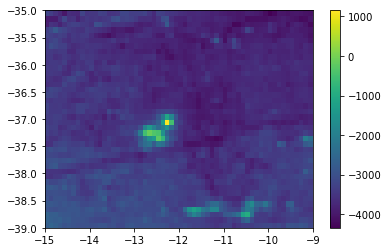

In [1039]:
x=np.arange(-39,-35+0.05,0.1)
y=np.arange(-15,-9+0.01,0.1)
plt.pcolormesh(y,x,topodat)
plt.colorbar(orientation='vertical')

In [13]:
indir='./GoodTT/'
list_file = glob.glob(os.path.join(indir,'*ph_smooth'))
per1= np.arange(3.5,7.6,0.1,dtype=float)
count=np.zeros(len(per1))
average=np.zeros(len(per1))
for filepath in list_file:
    phase_vel=np.loadtxt(filepath)
    for n, p in enumerate(per1) :   
        if np.any(phase_vel.T[0]==round(p,1)):
            if not np. isnan(phase_vel[phase_vel.T[0]==round(p,1)][0][1]):
                count[n]+=1
                average[n]+=phase_vel[phase_vel.T[0]==round(p,1)][0][1]
average1=average/count
count1=count
indir='./GoodRR/'
per2= np.arange(3.5,7.6,0.1,dtype=float)
list_file = glob.glob(os.path.join(indir,'*ph_smooth'))
count=np.zeros(len(per2))
average=np.zeros(len(per2))
for filepath in list_file:
    phase_vel=np.loadtxt(filepath)
    for n, p in enumerate(per2) :   
        if np.any(phase_vel.T[0]==round(p,1)):
            if not np. isnan(phase_vel[phase_vel.T[0]==round(p,1)][0][1]):
                count[n]+=1
                average[n]+=phase_vel[phase_vel.T[0]==round(p,1)][0][1]
average2=average/count
count2=count

In [7]:
from scipy.interpolate import UnivariateSpline,LSQUnivariateSpline,interp1d

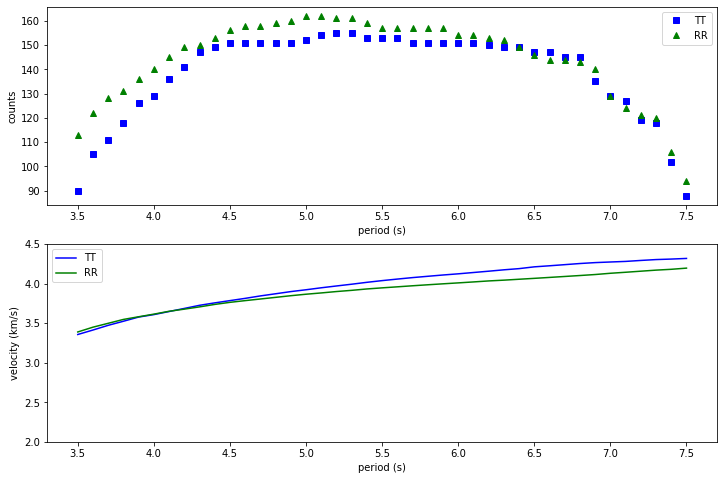

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.ylabel("counts") 
plt.xlabel("period (s)")
plt.plot(per2,count2,'bs',label='TT')
plt.plot(per1,count1,'g^',label='RR')
plt.legend()
plt.subplot(2,1,2)
plt.plot(per1,average1,'b',label='TT')
plt.plot(per2,average2,'g',label='RR')
plt.ylabel("velocity (km/s)") 
plt.xlabel("period (s)")
plt.ylim(2,4.5)
plt.legend()
plt.show()


In [7]:
def calwaterdepth(lat,lon):
    depth=0
    count=0
    for xi in np.arange(lon-0.5,lon+0.51,0.01):
        for yi in  np.arange(lat-0.5,lat+0.51,0.01):
            i=int((xi+40)/0.01)
            j=int((yi+16)/0.01)
            if topodat[i][j]<-0:
                depth=depth+topodat[i][j]
                count+=1
    depth=depth/count
    return depth
def writemod_surf96(model,filename):
#model is nlayer*4 matrix [H Vp Vs Density]
#model(:,0): H(KM)
#model(:,1): VP(KM/S)
#model(:,2): VS(KM/S)
#model(:,3): DENSITY(g/cm^3)
    QP=1000
    QS=200
    op=open('./%s'%filename, "w")
    op.write('MODEL.01\n')
    op.write('model\n')
    op.write('ISOTROPIC\n')
    op.write('KGS\n')
    op.write('FLAT EARTH\n')
    op.write('1-D\n')
    op.write('CONSTANT VELOCITY\n')
    op.write('LINE08\n')
    op.write('LINE09\n')
    op.write('LINE10\n')
    op.write('LINE11\n')
    op.write('      H(KM)   VP(KM/S)   VS(KM/S) RHO(GM/CC)     QP         QS       ETAP       ETAS      FREFP      FREFS    \n')   
    for i in range(0,len(model)):
        op.write('     %7.4f'%model[i][0])   
        op.write('     %7.4f'%model[i][1]) 
        op.write('     %7.4f'%model[i][2]) 
        op.write('     %7.4f'%model[i][3]) 
        if model[i][2]<0.01:
            op.write('     %7.4f'%1000.0) 
        else:
            op.write('     %7.4f'%QP) 
        if model[i][2]<0.01:
            op.write('     %7.4f'%0.0) 
        else:
            op.write('     %7.4f'%QS) 
        op.write('     0.00') 
        op.write('     0.00') 
        op.write('     1.00')   
        op.write('     1.00') 
        op.write('\n')
    op.close() 
    
def readdspfilr(filename):
    op = open(filename, "rb")
    RR=[]
    TT=[]
    line=op.readline()
    while (line):
        string=[x for x in line.decode('ascii').split(' ') if x]
        if string[1]=='R':
            RR.append([string[5],string[6]])
        if string[1]=='L':
            TT.append([string[5],string[6]])
        line=op.readline()
    op.close()
    RR=np.array(RR,dtype=float)
    TT=np.array(TT,dtype=float)
    return RR,TT
def writedisp_surf96(data,filename,overwrite=True):
# data nfreq*6 matrix: [wavetype('R'or'L'),veltype('C'or'U'),mode,vec_T, vec_v,vec_err]
#overwrite: T(overwrite) F(add)
    if overwrite:
        op=open('./%s'%filename, "w")
    else:
        op=open('./%s'%filename, "a")
    for i in range(0,len(data)):
        op.write('SURF96 %s %s X   %d   %7.4f   %7.4f   %7.4f\n'\
            %(data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5]))
    op.close()
def readmod_surf96(filename):
#  model is nlayer*4 matrix [thickness Vp Vs Density]
#model(:,0): H(KM)
#model(:,1): VP(KM/S)
#model(:,2): VS(KM/S)
#model(:,3): DENSITY(g/cm^3)
    op = open(filename, "rb")
    for i in range(0,12):
        line=op.readline()
    model=[]
    line=op.readline()
    while (line):
        string=[x for x in line.decode('ascii').split(' ') if x]
        model.append([string[0],string[1],string[2],string[3]])
        line=op.readline()
    op.close()
    return  model
def make_controlfile(datatype,startmodelfile,dispfile):
    op=open('sobs.d', "w")
    op.write('0.005 ') #df
    op.write('0.005 ') # dcr
    op.write('0. ');
    op.write('0.005 ') # dcl
    op.write('0. \n') # dcr
    op.write('1 ') # error based on redisual(1) or std of data(0)  
    if datatype=='R':
        op.write('0  0  0  0  2  0') #  if use gam_love/c_love/u_love/gama_ray/c_ray/u_ray
    elif datatype=='L':
        op.write('0  1  1  0  0  0') #  if use gam_love/c_love/u_love/gama_ray/c_ray/u_ray
    elif datatype=='J':
        op.write('0  1  0  0  2  0') #  if use gam_love/c_love/u_love/gama_ray/c_ray/u_ray
    else:
        print("erro in datatype!")
        return 
    op.write(' 0  1  0\n') # don't know what they mean
    op.write('%s'%startmodelfile) # name of starting model file
    op.write('\n')
    op.write('%s'%dispfile) # name of dispersion data file
    op.write('\n')
    op.close()
    
def obsfile(latlon):
    _, idx = tree.query(latlon)
    RR=vel3dRR.T[idx]
    TT=vel3dTT.T[idx]
    #make dispersin file

    data=[]

    for n,p in enumerate(pers2):
        data.append(['L','C',0,p,TT[n],0.01])


    for n,p in enumerate(pers1):
        data.append(['R','C',1,p,RR[n],0.01])

    '''
    for n,p in enumerate(per3):
        data.append(['R','C',0,per3[n],average3[n],0.1])
    '''

    writedisp_surf96(data,'obs.dsp')

In [2506]:
#make dispersin file

data=[]


for n,p in enumerate(per1):
    if np.isnan(average1[n]):
        continue
    data.append(['L','C',0,per1[n],average1[n],0.01])


for n,p in enumerate(per2):
    if np.isnan(average2[n]):
        continue
    data.append(['R','C',1,per2[n],average2[n],0.01])


writedisp_surf96(data,'obs.dsp')

In [1150]:
#make start model
waterdepth=3.4
vs_crsut=5
vs_mentle=5
startmodel=[]
startmodel=[[waterdepth,1.5,0.,1]]
#startmodel.append([1,4*1.73,4,3.3])
for i in np.arange(0,10,1):
    startmodel.append([1,vs_crsut*1.73,vs_crsut,3.3])
    
for i in np.arange(0,5):
    startmodel.append([2,vs_mentle*1.73,vs_mentle,3.3])
for i in np.arange(0,4):
    startmodel.append([5,vs_mentle*1.73,vs_mentle,3.3])
startmodel.append([5,vs_mentle*1.73,vs_mentle,3.3])
startmodel.append([0,vs_mentle*1.73,vs_mentle,3.3])
writemod_surf96(startmodel,'start.mod')

In [1834]:
make_controlfile('J','average.mod','obs.dsp')

In [2507]:
#inversion
os.system('surf96 39')
print('Setting smoohting profile...')
os.system('surf96 36 1')

os.system('surf96 31 1 5')

ind=5
ind2=7
ind3=13
for i in range(1,3):
    os.system('surf96 31 %d 5'%i)
for i in range(3,ind):
    os.system('surf96 31 %d 5'%i)
for i in range(ind,ind2):
    os.system('surf96 31 %d 5'%i)
for i in range(ind2,ind3):
    os.system('surf96 31 %d 5'%i)    
for i in range(ind3,len(startmodel)-2):
    os.system('surf96 31 %d 5'%i) 
for i in range(len(startmodel)-1,len(startmodel)+1):
    os.system('surf96 31 %d 5'%i) 
#os.system('surf96 48 2')
    
print('Start inversion....')
os.system('surf96 32 10 > log_surf96.txt')
os.system('surf96 37 2 1 2 6 >> log_surf96.txt')

niter=20
os.system('surf96 32 1 >> log_surf96.txt')
os.system('surf96 37 %d 1 2 6 >> log_surf96.txt'%niter)

os.system('surf96 45 >> log_surf96.txt') # write smoothing info into log

os.system('surf96 17 >> log_surf96.txt') # write dispersion of final model info into log

os.system('surf96 28 final.mod') # output model

os.system('surf96 1 27 temp.dsp')

os.system('surf96 45')

os.system('srfphv96 ') 
os.system('srfphr96 ') 

#os.system('surf96 39') 

os.system('shwmod96 -ZMAX 30  -VMIN 1 -VMAX 5.0 -K -1 -LEG  start.mod tmpmod96.??? final.mod')

os.system('plotnps -EPS -K -F7 -W10 < SHWMOD96.PLT > figsrf3.eps')
os.system('plotnps -EPS -K -F7 -W10 < SRFPHV96.PLT > figsrf1.eps')
os.system('plotnps -EPS -K -F7 -W10 < SRFPHR96.PLT > figsrf2.eps')

Setting smoohting profile...
Start inversion....


0

In [1002]:
os.system('cp final.mod  average.mod')

0

In [1729]:
filename='./temp.dsp'
RR,TT=readdspfilr(filename)
filename='./obs.dsp'
RRobs,TTobs=readdspfilr(filename)

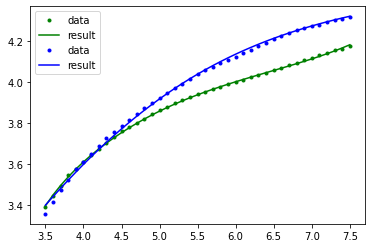

In [1730]:
plt.plot(RRobs.T[0],RRobs.T[1],'g.',label='data')
plt.plot(RR.T[0],RR.T[1],'g',label='result')
plt.plot(TTobs.T[0],TTobs.T[1],'b.',label='data')
plt.plot(TT.T[0],TT.T[1],'b',label='result')
#plt.xlim(3.5,7.5)
plt.legend()

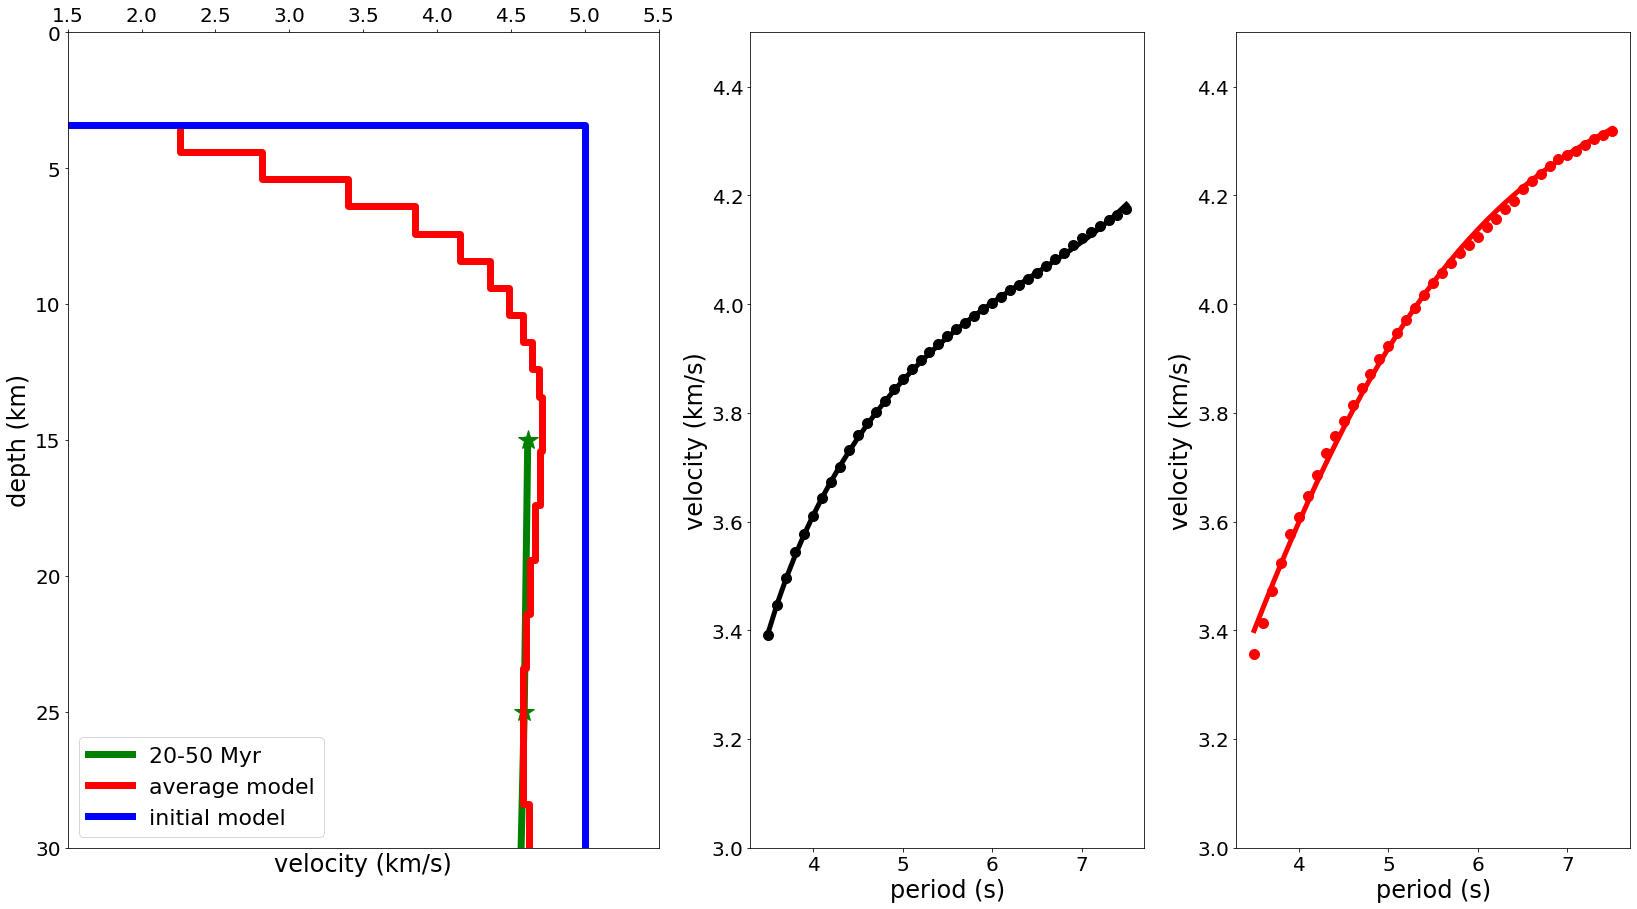

In [1731]:
fig, ax = plt.subplots(1, 3, figsize=(28,15),gridspec_kw={'width_ratios': [3,2, 2]})

model=readmod_surf96('average.mod')
modelref=np.loadtxt('refmod20-50.csv')
modelref2=np.loadtxt('refmod.csv')
modelref=np.array(modelref,dtype=float)
model=np.array(model)
model[0][0]=3.4
thick=np.array(model.T[0],dtype=float)
vs=np.array(model.T[2],dtype=float)
vsd, depth = [], []
for i in range(len(thick)):
        if not depth:
            depth.append(0)
        else:
            depth.append(depth[-1])
        vsd.append(vs[i])
        depth.append(depth[-1]+thick[i])
        vsd.append(vs[i])
ax[0].plot(modelref.T[2],modelref.T[0], 'g',linewidth=7.0, label='20-50 Myr')
ax[0].plot(modelref.T[2],modelref.T[0], 'g*',markersize=20)
ax[0].plot(vsd, depth, 'red',linewidth=7.0, label='average model')
model=readmod_surf96('start.mod')
model=np.array(model)
thick=np.array(model.T[0],dtype=float)
vs=np.array(model.T[2],dtype=float)
vsd, depth = [], []
for i in range(len(thick)):
        if not depth:
            depth.append(0)
        else:
            depth.append(depth[-1])
        vsd.append(vs[i])
        depth.append(depth[-1]+thick[i])
        vsd.append(vs[i])

ax[0].plot(vsd, depth, 'blue', linewidth=7.0,label='initial model')
ax[0].set_ylim(0,30)
ax[0].set_xlim(1.5,5.5)
ax[0].invert_yaxis()
ax[0].xaxis.tick_top()
ax[0].legend(fontsize=22)
ax[0].set_ylabel("depth (km)",size=24) 
ax[0].set_xlabel("velocity (km/s)",size=24)
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].plot(RR.T[0],RR.T[1],'k',linewidth=5,label='result')
ax[1].plot(RRobs.T[0],RRobs.T[1],'k.',markersize=20,label='data')
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].set_xlabel("period (s)",size=24) 
ax[1].set_ylabel("velocity (km/s)",size=24)
ax[1].set_ylim(3.,4.5)


ax[2].plot(TT.T[0],TT.T[1],'r',linewidth=5,label='result')
ax[2].plot(TTobs.T[0],TTobs.T[1],'r.',markersize=20,label='data')
ax[2].xaxis.set_tick_params(labelsize=20)
ax[2].yaxis.set_tick_params(labelsize=20)
ax[2].set_xlabel("period (s)",size=24) 
ax[2].set_ylabel("velocity (km/s)",size=24)
ax[2].set_ylim(3.,4.5)
plt.savefig('average1d.jpg')

# try inversion every grid 1-d velocity

In [13]:
outdir='./vel2D/size0.2-3/'
#outdir='./ph2D3/'
#model define
x=np.arange(-40,-35+0.1,0.2)
y=np.arange(-16,-9+0.1,0.2)
xg, yg = np.meshgrid(np.array(x),np.array(y))
xy=np.c_[yg.T.ravel(),xg.T.ravel()]

import scipy.spatial
tree = scipy.spatial.cKDTree(xy)
#outdir='./ph2D3//'
direction='RR'
pers1=np.arange(3.5,7.6,0.1)
vel3dRR=np.zeros((len(pers1),len(x)*len(y)))

for n,per in enumerate(pers1):
  
    fname='%s_%0.1f.vel'%(direction,per)
    count=0
    lines=np.loadtxt(outdir+'%s'%fname)
    vel3dRR[n]=lines.T[2]
direction='TT'
pers2=np.arange(3.5,7.6,0.1)
vel3dTT=np.zeros((len(pers2),len(x)*len(y)))  

for n,per in enumerate(pers2):

    fname='%s_%0.1f.vel'%(direction,per)
    count=0
    lines=np.loadtxt(outdir+'%s'%fname)

    vel3dTT[n]=lines.T[2]
#vel3dTT=np.round(vel3dTT,2)
#vel3dRR=np.round(vel3dRR,2)

In [14]:
x2=np.arange(-39.,-35.6+0.1,0.2)
y2=np.arange(-15.,-9.6+0.1,0.2)
xg, yg = np.meshgrid(np.array(x2),np.array(y2))
xy2=np.c_[yg.T.ravel(),xg.T.ravel()]
vel3dTT2=np.zeros((len(pers2),len(x2)*len(y2)))
vel3dRR2=np.zeros((len(pers1),len(x2)*len(y2)))
tree = scipy.spatial.cKDTree(xy)
for n,xyi in enumerate(xy2):  
    #xyi=xy[5]
    count=0
    RR=np.zeros(len(pers1))
    TT=np.zeros(len(pers2))
    for xi in np.arange(xyi[0]-0.0,xyi[0]+0.1,0.2):
        for yi in  np.arange(xyi[1]-0.,xyi[1]+0.1,0.2):
            _, idx = tree.query([xi,yi])
            RR+=vel3dRR.T[idx]
            TT+=vel3dTT.T[idx]
            count+=1
    RR=RR/count
    TT=TT/count
    vel3dRR2[:,n]=RR
    vel3dTT2[:,n]=TT


In [13]:
#inversion
def inversion1d(startmodel):
    os.system('surf96 39')
    print('Setting smoohting profile...')
    os.system('surf96 36 1')

    os.system('surf96 31 1 5')

    for i in range(0,len(startmodel)+1):
        os.system('surf96 31 %d 5'%i) 
    #os.system('surf96 48 2')

    print('Start inversion...')
    os.system('surf96 32 10 > log_surf96.txt')
    os.system('surf96 37 2 1 2 6 >> log_surf96.txt')

    niter=20
    os.system('surf96 32 1 >> log_surf96.txt')
    os.system('surf96 37 %d 1 2 6 >> log_surf96.txt'%niter)

    os.system('surf96 28 final.mod') # output model

    os.system('surf96 45')

    os.system('srfphv96 ') 
    os.system('srfphr96 ') 

    os.system('surf96 39') 

In [24]:
def make_modfile(loc):
    #make start model
    #obsfile(loc)
    lo=round(loc[0],1)
    la=round(loc[1],1)
    waterdepth=round(-calwaterdepth(lo,la)/1000,2)
    waterdepth=round(waterdepth,2)
    #waterdepth=3.2
    vs_crsut=4.5
    vs_mentle=4.5
    startmodel=[]
    print(waterdepth)
    startmodel=[[waterdepth,1.5,0.,1]]
    #startmodel.append([1,4*1.73,4,3.3])
    for i in np.arange(0,15,1):
        startmodel.append([1,vs_crsut*1.73,vs_crsut,3.3])

    for i in np.arange(0,4):
        startmodel.append([5,vs_mentle*1.73,vs_mentle,3.3])

    startmodel.append([10,vs_mentle*1.73,vs_mentle,3.3])
    startmodel.append([0,vs_mentle*1.73,vs_mentle,3.3])
    writemod_surf96(startmodel,'start.mod')

In [29]:
vsmodel=[]

tree = scipy.spatial.cKDTree(xy2)
make_controlfile('J','average.mod','obs.dsp')

for k,xyi in enumerate(xy2):
    #make_modfile(xyi)
    model=readmod_surf96('average.mod')
    model=np.array(model,dtype=float)
    lo=round(xyi[0],1)
    la=round(xyi[1],1)
    waterdepth=round(-calwaterdepth(lo,la)/1000,1)
    print(waterdepth)
    if waterdepth<=2.8:
        waterdepth=2.9
    '''
    if waterdepth>3.8:
        waterdepth=3.8
    '''
    model[0,0]=waterdepth
    writemod_surf96(model,'average.mod')

   
    #make dispersin file
    RR=np.zeros(len(pers1))
    TT=np.zeros(len(pers2))

    _, idx = tree.query(xyi)
    RR=vel3dRR2.T[idx]
    TT=vel3dTT2.T[idx]

    data=[]
    

    for n,p in enumerate(pers2[::]):
        #if (n % 2) == 0:
        data.append(['L','C',0,p,TT[n],0.2])
 
    for n,p in enumerate(pers1[0::]):
        data.append(['R','C',1,p,RR[n],0.2])
    
    
    writedisp_surf96(data,'obs.dsp')

    startmodel=readmod_surf96('average.mod')
    inversion1d(startmodel)
    os.system('mv ./temp.dsp ./inversion1d/size0.2-3/%0.2f%0.2f.dsp'%(xyi[0],xyi[1]))
    model=readmod_surf96('final.mod')
    model=np.array(model,dtype=float)
    vsmodel.append(np.array(model.T[2],dtype=float))
    os.system('mv ./final.mod ./inversion1d/size0.2-3/%0.2f%0.2f.mod'%(xyi[0],xyi[1]))
    os.system('mv ./temp.eps ./inversion1d/size0.2-3/%0.2f%0.2f.eps'%(xyi[0],xyi[1]))


3.5
Setting smoohting profile...
Start inversion...


In [18]:
vsmodel2=[]
for k,xyi in enumerate(xy2[::]):
    
    model=readmod_surf96('./inversion1d/size0.2-3/%0.2f%0.2f.mod'%(xyi[0],xyi[1]))
    #model=readmod_surf96('./inversion1d2/%0.2f%0.2f.mod'%(xyi[0],xyi[1]))
    model=np.array(model)
    vs=np.array(model.T[2],dtype=float)
    vsmodel2.append(vs)
vsmodel2=np.array(vsmodel2)

In [2983]:
v=vsmodel2.reshape(len(x2),len(y2),len(startmodel))

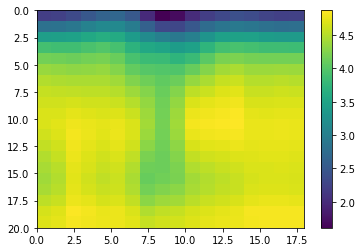

In [2762]:
plt.pcolormesh(np.round(v[:,13,1:21],2).T.reshape(20,len(x2)))
#plt.clim(3,4.5)
plt.colorbar(orientation='vertical')
plt.gca().invert_yaxis()
plt.show()

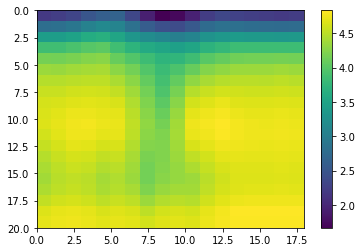

In [2308]:
plt.pcolormesh(v[:,12,1:21].T.reshape(20,len(x2)))
#plt.clim(3,5)
plt.colorbar(orientation='vertical')
plt.gca().invert_yaxis()
plt.show()

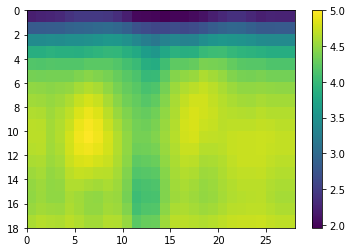

In [2763]:
plt.pcolormesh(np.round(v[7,:,1:19],2).T.reshape(18,len(y2)))

plt.colorbar(orientation='vertical')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Save a dictionary into a pickle file.
import pickle
pickle.dump( vsmodel2, open( "vs12-30-2.dat", "wb" ) )